In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns",None)
churn = pd.read_csv("churn.txt")
churn

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,3399958,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,LAXSFN818,2.0,2.0,526.0,68.0,64.0,No,Yes,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,60,No,1-Highest,Suburban,Other,Yes
51043,3399974,No,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,LAXCDG310,2.0,2.0,464.0,48.0,48.0,Yes,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,No,0,9,No,1,60,No,3-Good,Other,Other,No
51044,3399978,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,LAXCDG310,3.0,2.0,378.0,36.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,1,80,No,5-Low,Other,Clerical,No
51045,3399990,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,NEVPOW619,2.0,2.0,433.0,32.0,0.0,Yes,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,9,No,0,30,No,5-Low,Other,Other,No


In [2]:
string_columns = []
numeric_columns = []
for i,j in zip(churn.dtypes.index,churn.dtypes):
    if j == object:
        string_columns.append(i)
    else:
        numeric_columns.append(i)

churn["HandsetPrice"] = churn["HandsetPrice"].replace("Unknown",np.nan)
numeric_columns.append("HandsetPrice")
string_columns.remove("HandsetPrice")

In [3]:
len(string_columns)+len(numeric_columns)

58

In [4]:
for i in string_columns:
    print(f"{i} -- class size : {churn[i].nunique()}")

Churn -- class size : 2
ServiceArea -- class size : 747
ChildrenInHH -- class size : 2
HandsetRefurbished -- class size : 2
HandsetWebCapable -- class size : 2
TruckOwner -- class size : 2
RVOwner -- class size : 2
Homeownership -- class size : 2
BuysViaMailOrder -- class size : 2
RespondsToMailOffers -- class size : 2
OptOutMailings -- class size : 2
NonUSTravel -- class size : 2
OwnsComputer -- class size : 2
HasCreditCard -- class size : 2
NewCellphoneUser -- class size : 2
NotNewCellphoneUser -- class size : 2
OwnsMotorcycle -- class size : 2
MadeCallToRetentionTeam -- class size : 2
CreditRating -- class size : 7
PrizmCode -- class size : 4
Occupation -- class size : 8
MaritalStatus -- class size : 3


In [5]:
churn["ServiceArea"]

0        SEAPOR503
1        PITHOM412
2        MILMIL414
3        PITHOM412
4        OKCTUL918
           ...    
51042    LAXSFN818
51043    LAXCDG310
51044    LAXCDG310
51045    NEVPOW619
51046    NEVPOW619
Name: ServiceArea, Length: 51047, dtype: object

In [6]:
string_columns.remove("ServiceArea")

In [7]:
for i in numeric_columns:
    if churn[i].nunique() <= 10:
        print(f"{i} -- unique size : {churn[i].nunique()}")

RetentionCalls -- unique size : 5
RetentionOffersAccepted -- unique size : 4
IncomeGroup -- unique size : 10


In [8]:
churn[["IncomeGroup","RetentionCalls","RetentionOffersAccepted"]]

,IncomeGroup,RetentionCalls,RetentionOffersAccepted
0,4,1,0
1,5,0,0
2,6,0,0
3,6,0,0
4,9,0,0
...,...,...,...
51042,6,0,0
51043,9,0,0
51044,7,0,0
51045,9,0,0


In [9]:
string_columns.append("IncomeGroup")
string_columns.append("RetentionCalls")
string_columns.append("RetentionOffersAccepted")
numeric_columns.remove("IncomeGroup")
numeric_columns.remove("RetentionCalls")
numeric_columns.remove("RetentionOffersAccepted")

In [10]:
categoric = pd.get_dummies(churn[string_columns].astype(object),drop_first=True)

In [11]:
x = pd.concat([churn[numeric_columns],categoric],axis=1)
x = x.drop("CustomerID",axis=1)
x

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ReferralsMadeBySubscriber,AdjustmentsToCreditRating,HandsetPrice,Churn_Yes,ChildrenInHH_Yes,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,RVOwner_Yes,Homeownership_Unknown,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,OwnsComputer_Yes,HasCreditCard_Yes,NewCellphoneUser_Yes,NotNewCellphoneUser_Yes,OwnsMotorcycle_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,CreditRating_6-VeryLow,CreditRating_7-Lowest,PrizmCode_Rural,PrizmCode_Suburban,PrizmCode_Town,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_Unknown,MaritalStatus_Yes,IncomeGroup_1,IncomeGroup_2,IncomeGroup_3,IncomeGroup_4,IncomeGroup_5,IncomeGroup_6,IncomeGroup_7,IncomeGroup_8,IncomeGroup_9,RetentionCalls_1,RetentionCalls_2,RetentionCalls_3,RetentionCalls_4,RetentionOffersAccepted_1,RetentionOffersAccepted_2,RetentionOffersAccepted_3
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,2.0,2.0,361.0,62.0,0.0,0,0,30,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,2.0,1.0,1504.0,40.0,42.0,0,0,30,1,1,0,0,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,1.0,1.0,1812.0,26.0,26.0,0,0,NaN,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,9.0,4.0,458.0,30.0,0.0,0,0,10,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,4.0,3.0,852.0,46.0,54.0,0,1,10,1,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51042,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.3,2.7,48.3,0.0,0.0,58.9,17.0,1.3,160.3,33.3,12.0,0.0,0.3,29,1,1,2.0,2.0,526.0,68.0,64.0,0,0,60,1,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
51043,95.17,1745.0,85.0,0.99,45.0,4.7,122.0,15.9,16.7,0.7,41.3,0.0,0.0,681.5,89.7,33.3,318.7,248.3,17.3,0.0,14.3,29,1,1,2.0,2.0,464.0,48.0,48.0,0,1,60,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
51044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.7,4.3,287.0,1.3,13.7,1225.3,430.3,87.7,1359.0,910.3,76.0,0.0,6.7,25,1,1,3.0,2.0,378.0,36.0,0.0,0,1,80,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
51045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31,1,1,2.0,2.0,433.0,32.0,0.0,0,0,30,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [12]:
x2 = x.dropna(subset=["MonthlyRevenue"])
for i in x2.columns:
    print(f"{i} --- none value ratio is : {round(x2[i].isna().sum() / len(x2),5)}")

MonthlyRevenue --- none value ratio is : 0.0
MonthlyMinutes --- none value ratio is : 0.0
TotalRecurringCharge --- none value ratio is : 0.0
DirectorAssistedCalls --- none value ratio is : 0.0
OverageMinutes --- none value ratio is : 0.0
RoamingCalls --- none value ratio is : 0.0
PercChangeMinutes --- none value ratio is : 0.00415
PercChangeRevenues --- none value ratio is : 0.00415
DroppedCalls --- none value ratio is : 0.0
BlockedCalls --- none value ratio is : 0.0
UnansweredCalls --- none value ratio is : 0.0
CustomerCareCalls --- none value ratio is : 0.0
ThreewayCalls --- none value ratio is : 0.0
ReceivedCalls --- none value ratio is : 0.0
OutboundCalls --- none value ratio is : 0.0
InboundCalls --- none value ratio is : 0.0
PeakCallsInOut --- none value ratio is : 0.0
OffPeakCallsInOut --- none value ratio is : 0.0
DroppedBlockedCalls --- none value ratio is : 0.0
CallForwardingCalls --- none value ratio is : 0.0
CallWaitingCalls --- none value ratio is : 0.0
MonthsInService ---

In [13]:
x2[["HandsetPrice","Handsets","HandsetModels"]]

,HandsetPrice,Handsets,HandsetModels
0,30,2.0,2.0
1,30,2.0,1.0
2,NaN,1.0,1.0
3,10,9.0,4.0
4,10,4.0,3.0
...,...,...,...
51037,NaN,1.0,1.0
51039,NaN,1.0,1.0
51040,NaN,1.0,1.0
51041,30,2.0,2.0


In [14]:
x2["HandsetPrice"] = x2["HandsetPrice"].fillna(0)

c:\users\berk\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
x3 = x2.dropna(subset=["Handsets"])
for i in x3.columns:
    print(f"{i} --- none value ratio is : {round(x3[i].isna().sum() / len(x3),5)}")

MonthlyRevenue --- none value ratio is : 0.0
MonthlyMinutes --- none value ratio is : 0.0
TotalRecurringCharge --- none value ratio is : 0.0
DirectorAssistedCalls --- none value ratio is : 0.0
OverageMinutes --- none value ratio is : 0.0
RoamingCalls --- none value ratio is : 0.0
PercChangeMinutes --- none value ratio is : 0.00415
PercChangeRevenues --- none value ratio is : 0.00415
DroppedCalls --- none value ratio is : 0.0
BlockedCalls --- none value ratio is : 0.0
UnansweredCalls --- none value ratio is : 0.0
CustomerCareCalls --- none value ratio is : 0.0
ThreewayCalls --- none value ratio is : 0.0
ReceivedCalls --- none value ratio is : 0.0
OutboundCalls --- none value ratio is : 0.0
InboundCalls --- none value ratio is : 0.0
PeakCallsInOut --- none value ratio is : 0.0
OffPeakCallsInOut --- none value ratio is : 0.0
DroppedBlockedCalls --- none value ratio is : 0.0
CallForwardingCalls --- none value ratio is : 0.0
CallWaitingCalls --- none value ratio is : 0.0
MonthsInService ---

<AxesSubplot:>

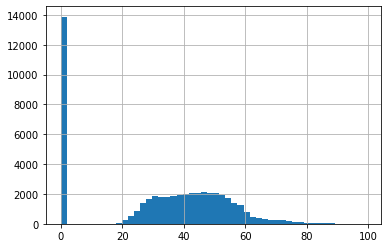

In [16]:
x3["AgeHH1"].hist(bins=50)

<AxesSubplot:>

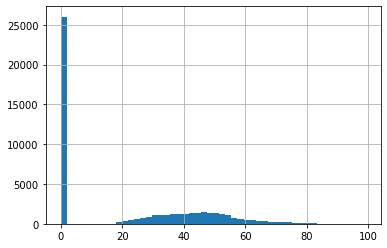

In [17]:
x3["AgeHH2"].hist(bins=50)

<AxesSubplot:>

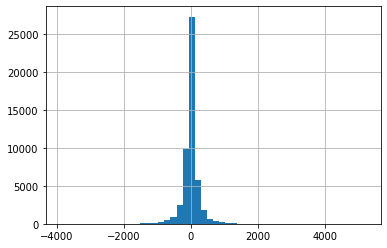

In [18]:
x3["PercChangeMinutes"].hist(bins=50)

<AxesSubplot:>

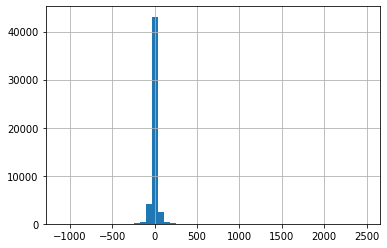

In [19]:
x3["PercChangeRevenues"].hist(bins=50)

In [20]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(x3)

In [21]:
imputed_data = pd.DataFrame(imputed_data,columns=x3.columns)

<AxesSubplot:>

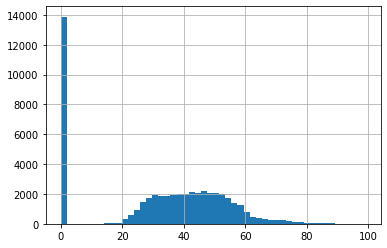

In [22]:
imputed_data["AgeHH1"].hist(bins=50)

<AxesSubplot:>

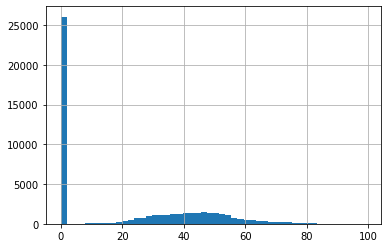

In [23]:
imputed_data["AgeHH2"].hist(bins=50)

In [24]:
y = imputed_data[["Churn_Yes"]]
y.columns = ["churn"]
x = imputed_data.drop("Churn_Yes",axis=1) 

In [25]:
y.value_counts(normalize=True)

churn
0.0      0.712301
1.0      0.287699
dtype: float64

In [26]:
numeric_col = []
categoric_col = []
for i,j in zip(x.nunique().index,x.nunique() > 2):
    if j == True:
        numeric_col.append(i)
    else:
        categoric_col.append(i)

In [27]:
from sklearn.preprocessing import RobustScaler ,StandardScaler , MinMaxScaler
rb = RobustScaler().fit(x[numeric_col])
sc = StandardScaler().fit(x[numeric_col])
mn = MinMaxScaler().fit(x[numeric_col])
X_rb = pd.DataFrame(rb.transform(x[numeric_col]),columns=numeric_col)
X_sc = pd.DataFrame(sc.transform(x[numeric_col]),columns=numeric_col)
X_mn = pd.DataFrame(mn.transform(x[numeric_col]),columns=numeric_col)
X_rb = pd.concat([X_rb,x[categoric_col]],axis=1)
X_sc = pd.concat([X_sc,x[categoric_col]],axis=1)
X_mn = pd.concat([X_mn,x[categoric_col]],axis=1)

In [28]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(n_jobs=-1,random_state=0).fit_resample(X_rb, y)
X_resampled_mn, y_resampled_mn = SMOTE(n_jobs=-1,random_state=0).fit_resample(X_mn, y)

In [29]:
y_resampled.value_counts(normalize=True)

churn
0.0      0.5
1.0      0.5
dtype: float64

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=1)

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
model = lr.fit(X_train,y_train)

c:\users\berk\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
c:\users\berk\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [32]:
model.score(X_test,y_test)

0.5975172413793104

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif , chi2 , mutual_info_classif


selector = SelectKBest(f_classif, k=30)
X_new = selector.fit_transform(X_resampled, y_resampled)
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                columns=X_rb.columns)
selected_columns_f = selected_features.columns[selected_features.var() != 0]

x[selected_columns_f]

c:\users\berk\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,PercChangeMinutes,DroppedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallWaitingCalls,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetPrice,HandsetWebCapable_Yes,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_5-Low,MaritalStatus_Unknown,RetentionCalls_1
0,24.00,219.0,22.0,0.25,-157.0,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.3,2.0,2.0,361.0,62.0,0.0,30.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
1,16.99,10.0,17.0,0.00,-4.0,0.3,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,2.0,1.0,1504.0,40.0,42.0,30.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,38.00,8.0,38.0,0.00,-2.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,82.28,1312.0,75.0,1.24,157.0,52.0,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,22.7,9.0,4.0,458.0,30.0,0.0,10.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,852.0,46.0,54.0,10.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50885,31.92,63.0,17.0,0.00,-38.0,0.7,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.3,1.0,1.0,883.0,58.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
50886,50.00,492.0,50.0,0.00,0.0,3.7,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.3,1.0,1.0,882.0,26.8,23.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
50887,71.99,724.0,70.0,0.00,-40.0,14.3,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.7,1.0,1.0,882.0,50.0,60.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
50888,117.49,384.0,30.0,0.00,0.0,4.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,2.0,2.0,489.0,22.0,0.0,30.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [34]:
selector = SelectKBest(chi2, k=30)
X_new = selector.fit_transform(X_resampled_mn, y_resampled_mn)
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                columns=X_mn.columns)
selected_columns_chi = selected_features.columns[selected_features.var() != 0]

x[selected_columns_chi]

,MonthlyMinutes,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetPrice,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,NewCellphoneUser_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,Occupation_Retired,MaritalStatus_Unknown,IncomeGroup_3,RetentionCalls_1,RetentionOffersAccepted_1
0,219.0,97.2,0.0,0.0,58.0,24.0,2.0,2.0,361.0,62.0,0.0,30.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,10.0,0.0,0.0,0.0,5.0,1.0,2.0,1.0,1504.0,40.0,42.0,30.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.0,0.4,0.3,0.0,1.3,3.7,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1312.0,200.3,370.3,147.0,555.7,303.7,9.0,4.0,458.0,30.0,0.0,10.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,852.0,46.0,54.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50885,63.0,14.0,0.0,0.0,16.0,14.7,1.0,1.0,883.0,58.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50886,492.0,7.5,6.7,0.0,48.3,19.3,1.0,1.0,882.0,26.8,23.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50887,724.0,70.2,25.7,0.3,262.0,12.7,1.0,1.0,882.0,50.0,60.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50888,384.0,21.7,1.3,0.0,99.3,54.3,2.0,2.0,489.0,22.0,0.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [35]:
selector = SelectKBest(mutual_info_classif, k=30)
X_new = selector.fit_transform(X_resampled, y_resampled)
selected_features = pd.DataFrame(selector.inverse_transform(X_new), 
                                columns=X_rb.columns)
selected_columns_mi = selected_features.columns[selected_features.var() != 0]

x[selected_columns_mi]

c:\users\berk\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallWaitingCalls,MonthsInService,UniqueSubs,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetPrice,CreditRating_2-High,PrizmCode_Suburban
0,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.3,61.0,2.0,2.0,2.0,361.0,62.0,0.0,30.0,0.0,1.0
1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,58.0,1.0,2.0,1.0,1504.0,40.0,42.0,30.0,0.0,1.0
2,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,60.0,1.0,1.0,1.0,1812.0,26.0,26.0,0.0,0.0,0.0
3,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,22.7,59.0,2.0,9.0,4.0,458.0,30.0,0.0,10.0,0.0,0.0
4,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,2.0,4.0,3.0,852.0,46.0,54.0,10.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50885,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.3,30.0,1.0,1.0,1.0,883.0,58.0,0.0,0.0,0.0,0.0
50886,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.3,30.0,1.0,1.0,1.0,882.0,26.8,23.2,0.0,0.0,1.0
50887,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.7,30.0,1.0,1.0,1.0,882.0,50.0,60.0,0.0,0.0,0.0
50888,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,30.0,1.0,2.0,2.0,489.0,22.0,0.0,30.0,0.0,0.0


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
rf = RandomForestClassifier(criterion="gini",n_estimators=400,max_features="log2",class_weight="balanced_subsample")
rf.fit(X_resampled,y_resampled)

c:\users\berk\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(class_weight='balanced_subsample', max_features='log2',
                       n_estimators=400)

In [37]:
importance = rf.feature_importances_
index = np.argsort(importance)
feature = X_rb.columns[index]
rf_imp = pd.DataFrame({"feature":feature,
             "importance":importance}).sort_values("importance",ascending=False)
rf_imp["perc_importance"] = (rf_imp["importance"] / rf_imp["importance"].sum(axis=0)).round(3)
rf_imp[:50]

,feature,importance,perc_importance
21,RetentionCalls_1,0.048314,0.048
26,RVOwner_Yes,0.046091,0.046
6,CallForwardingCalls,0.033268,0.033
1,RetentionOffersAccepted_3,0.032503,0.033
0,RetentionCalls_4,0.030658,0.031
7,Occupation_Student,0.029847,0.030
2,RetentionCalls_3,0.029352,0.029
16,AdjustmentsToCreditRating,0.028003,0.028
17,IncomeGroup_1,0.027111,0.027
13,IncomeGroup_2,0.026461,0.026


In [38]:
X_resampled = pd.DataFrame(X_resampled,columns=X_rb.columns)

In [39]:
import warnings
warnings.filterwarnings("ignore")

for j,i in zip(["chi_square","f","mutual info","importance"],[selected_columns_chi,selected_columns_f,selected_columns_mi,rf_imp[:30]["feature"]]):
    
    X_train, X_test, y_train, y_test = train_test_split(X_resampled[i], y_resampled,test_size=0.2, random_state=1)
    model = lr.fit(X_train,y_train)
    print(f"{j} : {model.score(X_test,y_test)}\n")

chi_square : 0.5850344827586207

f : 0.583103448275862

mutual info : 0.577655172413793

importance : 0.5402758620689655



In [40]:
set(selected_columns_chi) - set(selected_columns_f)

{'CreditRating_3-Good',
 'CreditRating_4-Medium',
 'HandsetRefurbished_Yes',
 'IncomeGroup_3',
 'NewCellphoneUser_Yes',
 'NonUSTravel_Yes',
 'Occupation_Retired',
 'OptOutMailings_Yes',
 'RetentionOffersAccepted_1',
 'TruckOwner_Yes'}

In [41]:
set(selected_columns_f) - set(selected_columns_chi)

{'CallWaitingCalls',
 'CustomerCareCalls',
 'DirectorAssistedCalls',
 'DroppedBlockedCalls',
 'DroppedCalls',
 'MonthlyRevenue',
 'PercChangeMinutes',
 'ThreewayCalls',
 'TotalRecurringCharge',
 'UnansweredCalls'}

In [42]:
last_col = []
for i in selected_columns_chi:
    last_col.append(i)
for i in set(selected_columns_f) - set(selected_columns_chi):
    last_col.append(i)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[last_col], y_resampled,test_size=0.2, random_state=1)
model = lr.fit(X_train,y_train)
print(f"last columns accuracy score : {model.score(X_test,y_test)}\n{X_train.shape[1]} columns")

last columns accuracy score : 0.5897241379310345
40 columns


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled,test_size=0.2, random_state=1)
model = lr.fit(X_train,y_train)
print(f"all data accuracy score : {model.score(X_test,y_test)}\n{X_train.shape[1]} columns")

all data accuracy score : 0.5975172413793104
82 columns


In [45]:
x[last_col].describe().T

,count,mean,std,min,25%,50%,75%,max
MonthlyMinutes,50890.0,525.663745,529.871145,0.00,158.00,366.00,723.00,7359.00
ReceivedCalls,50890.0,114.973712,166.527395,0.00,8.50,52.90,153.80,2692.40
OutboundCalls,50890.0,25.405199,35.173475,0.00,3.30,13.70,34.00,644.30
InboundCalls,50890.0,8.190676,16.675901,0.00,0.00,2.00,9.30,519.30
PeakCallsInOut,50890.0,90.632537,104.809556,0.00,23.30,62.30,121.30,2090.70
OffPeakCallsInOut,50890.0,67.739703,92.743834,0.00,11.00,35.70,88.70,1474.70
Handsets,50890.0,1.804284,1.329860,1.00,1.00,1.00,2.00,24.00
HandsetModels,50890.0,1.558047,0.905496,1.00,1.00,1.00,2.00,15.00
CurrentEquipmentDays,50890.0,379.832914,252.847765,-5.00,205.00,329.00,514.00,1812.00
AgeHH1,50890.0,31.318436,21.943546,0.00,0.00,36.00,48.00,99.00


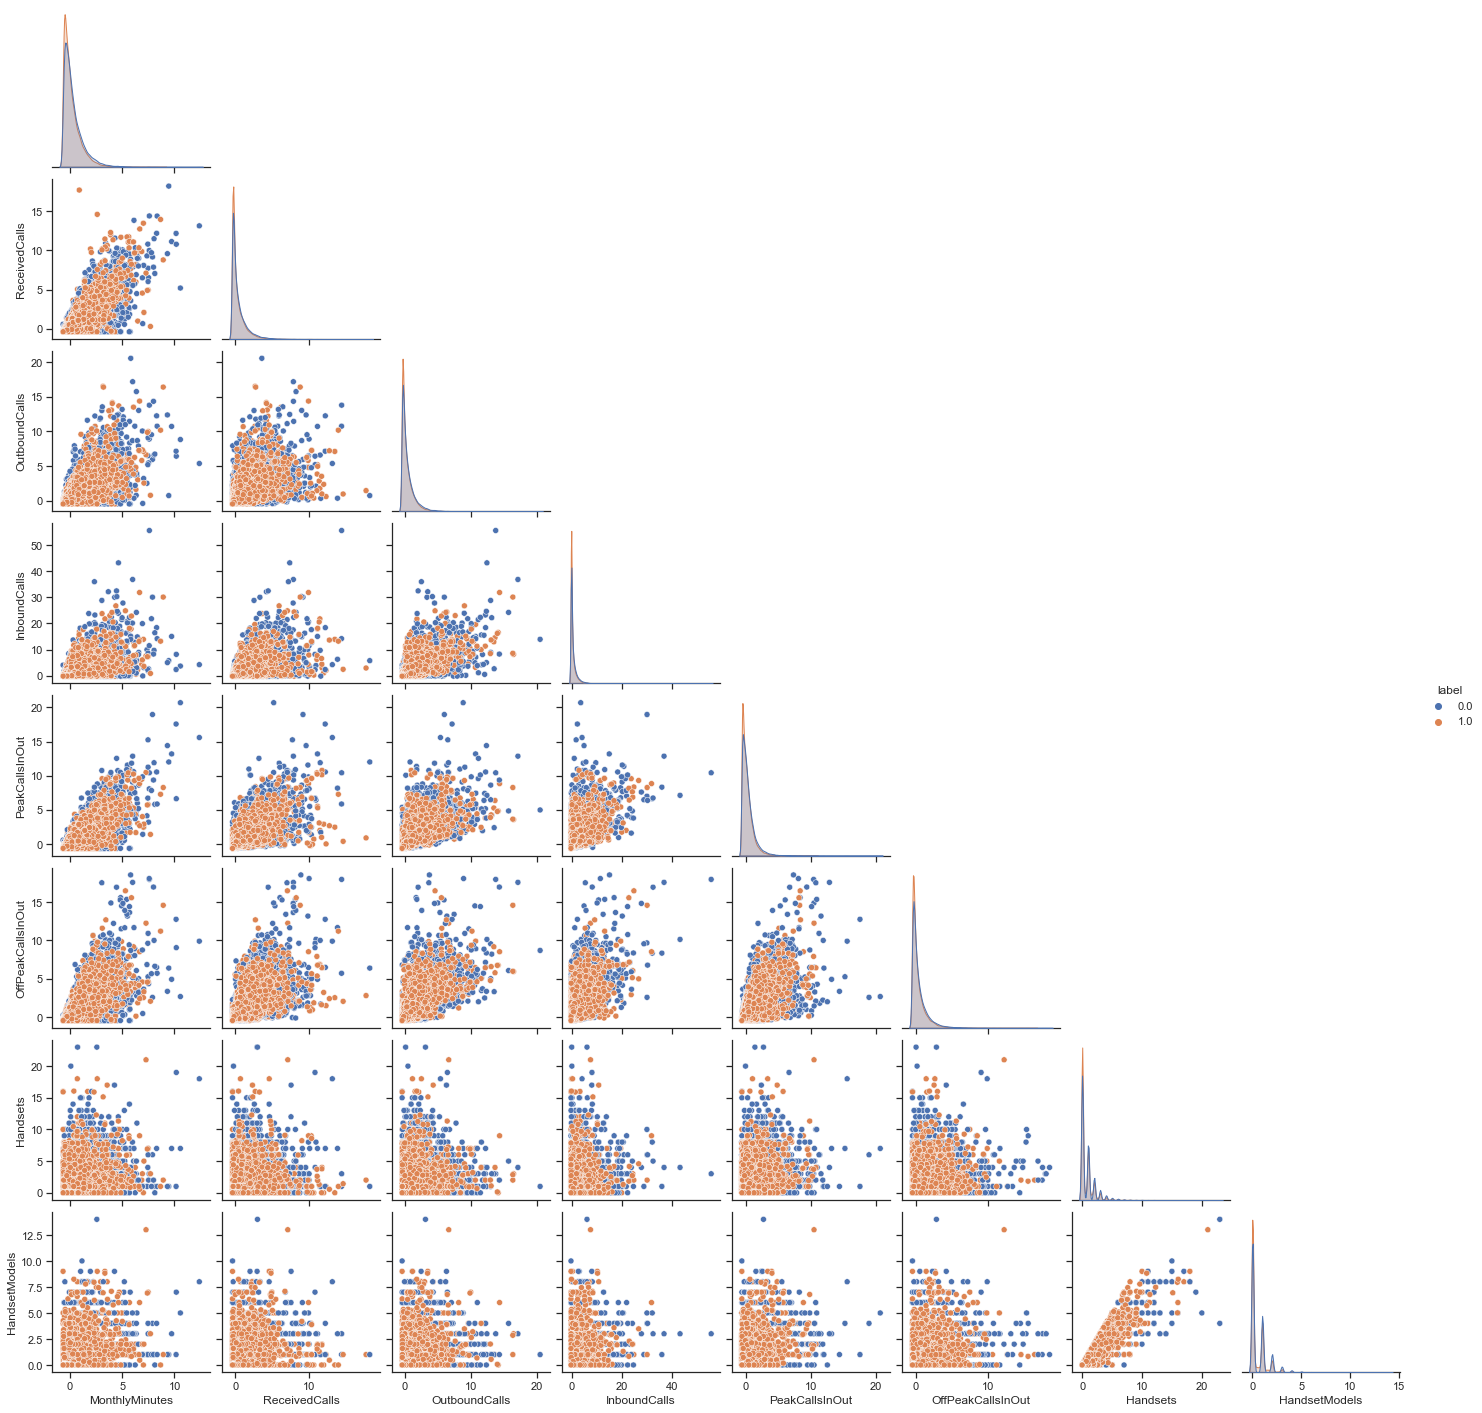

In [108]:
import seaborn as sns
df = X_resampled[last_col].iloc[:,:8].copy()
df["label"] = y_resampled.values
sns.set_theme(style="ticks")
sns.pairplot(df,hue="label",corner=True)

![](logit_graph.png)
![](logit_graph2.png)


---

![](logit.png)
![](logit3.png)

![](sigmoid.png)


![](logit2.jpg)


In [46]:
from statsmodels.discrete.discrete_model import Logit
X_train, X_test, y_train, y_test = train_test_split(X_resampled[last_col], y_resampled,test_size=0.2, random_state=1)
model_logit = Logit(endog=y_train,exog=X_train).fit()
model_logit.summary()

Optimization terminated successfully.
         Current function value: 0.671677
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                57998
Model:                          Logit   Df Residuals:                    57958
Method:                           MLE   Df Model:                           39
Date:                Wed, 06 Jan 2021   Pseudo R-squ.:                 0.03097
Time:                        14:27:31   Log-Likelihood:                -38956.
converged:                       True   LL-Null:                       -40201.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MonthlyMinutes                 -0.2204      0.024     -9.076      0.000      -0.268      -0.173
ReceivedCalls                   0.0377      0.017      2.269      0.023       0.005       0.070
OutboundCalls                   0.0309      0.015      2.010      0.044       0.001       0.061
InboundCalls                   -0.0315      0.008     -3.773      0.000      -0.048      -0.015
PeakCallsInOut                 -0.0552      0.018     -2.994      0.003      -0.091      -0.019
OffPeakCallsInOut               0.0092      0.018      0.515      0.607      -0.026       0.044
Handsets                       -0.0054      0.016     -0.350      0.727      -0.036       0.025
HandsetModels                  -0.0466      0.023     -2.062      0.039      -0.091      -0.002
CurrentEquipmentDays            0.2762      0.012     22.557      0.000       0.252       0.300
AgeHH1                         -0.2824      0.030     -9.340      0.000      -0.342      -0.223
AgeHH2                          0.0120      0.022      0.542      0.588      -0.032       0.056
HandsetPrice                    0.0355      0.008      4.496      0.000       0.020       0.051
HandsetRefurbished_Yes          0.2451      0.027      8.949      0.000       0.191       0.299
HandsetWebCapable_Yes          -0.1203      0.023     -5.174      0.000      -0.166      -0.075
TruckOwner_Yes                 -0.0351      0.024     -1.432      0.152      -0.083       0.013
BuysViaMailOrder_Yes            0.1545      0.077      2.000      0.046       0.003       0.306
RespondsToMailOffers_Yes       -0.2391      0.077     -3.093      0.002      -0.391      -0.088
OptOutMailings_Yes             -0.2498      0.078     -3.222      0.001      -0.402      -0.098
NonUSTravel_Yes                -0.1140      0.041     -2.810      0.005      -0.194      -0.034
NewCellphoneUser_Yes           -0.1167      0.023     -5.144      0.000      -0.161      -0.072
MadeCallToRetentionTeam_Yes     0.9055      0.187      4.834      0.000       0.538       1.273
CreditRating_2-High             0.1884      0.023      8.222      0.000       0.144       0.233
CreditRating_3-Good             0.1330      0.028      4.828      0.000       0.079       0.187
CreditRating_4-Medium          -0.1228      0.033     -3.733      0.000      -0.187      -0.058
CreditRating_5-Low             -0.3515      0.033    -10.810      0.000      -0.415      -0.288
Occupation_Retired             -0.2725      0.080     -3.402      0.001      -0.429      -0.116
MaritalStatus_Unknown           0.0370      0.023      1.640      0.101      -0.007       0.081
IncomeGroup_3                  -0.1060      0.039     -2.708      0.007      -0.183      -0.029
RetentionCalls_1               -0.1659      0.187     -0.887      0.375      -0.532       0.201
RetentionOffersAccepted_1      -0.2721      0.100     -2.711      0.007      -0.469      -0.075
ThreewayCalls                  -0.0116      0.003     -3.853      0.000  

In [81]:
np.exp(0.1884)

1.2073163453153006

In [47]:
logit_pred = model_logit.predict(X_train)
logit_pred

32691    0.479951
48024    0.452692
19867    0.409951
70325    0.618953
49563    0.596778
           ...   
49100    0.312387
20609    0.546512
21440    0.440550
50057    0.427860
5192     0.476297
Length: 57998, dtype: float64

In [48]:
y_odds = np.log(logit_pred/( 1 - logit_pred ))

In [49]:
from statsmodels.regression.linear_model import OLS
model_ols = OLS(endog=y_odds,exog=X_train).fit()
model_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          5.815e+31
Date:                Wed, 06 Jan 2021   Prob (F-statistic):                        0.00
Time:                        14:27:31   Log-Likelihood:                      1.8761e+06
No. Observations:               57998   AIC:                                 -3.752e+06
Df Residuals:                   57958   BIC:                                 -3.752e+06
Df Model:                          40                                                  
Covariance Type:            nonrobust                                                  
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
MonthlyMinutes                 -0.2204   2.51e-17  -8.76e+15      0.000      -0.220      -0.220
ReceivedCalls                   0.0377   1.72e-17   2.19e+15      0.000       0.038       0.038
OutboundCalls                   0.0309   1.59e-17   1.95e+15      0.000       0.031       0.031
InboundCalls                   -0.0315   8.45e-18  -3.73e+15      0.000      -0.032      -0.032
PeakCallsInOut                 -0.0552    1.9e-17   -2.9e+15      0.000      -0.055      -0.055
OffPeakCallsInOut               0.0092   1.83e-17      5e+14      0.000       0.009       0.009
Handsets                       -0.0054   1.61e-17  -3.36e+14      0.000      -0.005      -0.005
HandsetModels                  -0.0466   2.36e-17  -1.97e+15      0.000      -0.047      -0.047
CurrentEquipmentDays            0.2762   1.27e-17   2.17e+16      0.000       0.276       0.276
AgeHH1                         -0.2824    3.2e-17  -8.84e+15      0.000      -0.282      -0.282
AgeHH2                          0.0120   2.35e-17   5.12e+14      0.000       0.012       0.012
HandsetPrice                    0.0355   8.32e-18   4.27e+15      0.000       0.036       0.036
HandsetRefurbished_Yes          0.2451   2.89e-17   8.48e+15      0.000       0.245       0.245
HandsetWebCapable_Yes          -0.1203   2.45e-17  -4.91e+15      0.000      -0.120      -0.120
TruckOwner_Yes                 -0.0351   2.59e-17  -1.35e+15      0.000      -0.035      -0.035
BuysViaMailOrder_Yes            0.1545   8.11e-17    1.9e+15      0.000       0.154       0.154
RespondsToMailOffers_Yes       -0.2391   8.12e-17  -2.94e+15      0.000      -0.239      -0.239
OptOutMailings_Yes             -0.2498   8.18e-17  -3.05e+15      0.000      -0.250      -0.250
NonUSTravel_Yes                -0.1140    4.3e-17  -2.65e+15      0.000      -0.114      -0.114
NewCellphoneUser_Yes           -0.1167   2.39e-17  -4.87e+15      0.000      -0.117      -0.117
MadeCallToRetentionTeam_Yes     0.9055   1.89e-16    4.8e+15      0.000       0.905       0.905
CreditRating_2-High             0.1884   2.43e-17   7.76e+15      0.000       0.188       0.188
CreditRating_3-Good             0.1330   2.92e-17   4.56e+15      0.000       0.133       0.133
CreditRating_4-Medium          -0.1228   3.48e-17  -3.53e+15      0.000      -0.123      -0.123
CreditRating_5-Low             -0.3515    3.4e-17  -1.03e+16      0.000      -0.351      -0.351
Occupation_Retired             -0.2725   8.35e-17  -3.26e+15      0.000      -0.272      -0.272
MaritalStatus_Unknown           0.0370   2.39e-17   1.55e+15      0.000       0.037       0.037
IncomeGroup_3                  -0.1060   4.12e-17  -2.57e+15      0.000      -0.106      -0.106
Retentio

In [50]:
np.exp(-0.2204)

0.8021978546362379

In [51]:
ols_pred = model_ols.predict(X_train)

In [52]:
1 / (1 + np.exp(-ols_pred)) 

32691    0.479951
48024    0.452692
19867    0.409951
70325    0.618953
49563    0.596778
           ...   
49100    0.312387
20609    0.546512
21440    0.440550
50057    0.427860
5192     0.476297
Length: 57998, dtype: float64

In [53]:
logit_pred

32691    0.479951
48024    0.452692
19867    0.409951
70325    0.618953
49563    0.596778
           ...   
49100    0.312387
20609    0.546512
21440    0.440550
50057    0.427860
5192     0.476297
Length: 57998, dtype: float64

In [54]:
pd.DataFrame({"pred":model_logit.predict(X_test),
             "true":y_test["churn"]})

,pred,true
48587,0.389264,0.0
27940,0.492535,0.0
21392,0.496846,0.0
28285,0.244781,0.0
13412,0.634505,0.0
...,...,...
159,0.144041,0.0
62687,0.474793,1.0
17651,0.601312,1.0
17125,0.604208,1.0


In [55]:
x[last_col].loc[[17651]]

,MonthlyMinutes,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetPrice,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,NewCellphoneUser_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,Occupation_Retired,MaritalStatus_Unknown,IncomeGroup_3,RetentionCalls_1,RetentionOffersAccepted_1,ThreewayCalls,MonthlyRevenue,CustomerCareCalls,PercChangeMinutes,DirectorAssistedCalls,CallWaitingCalls,TotalRecurringCharge,UnansweredCalls,DroppedBlockedCalls,DroppedCalls
17651,260.0,120.9,24.7,3.0,50.3,39.0,2.0,2.0,392.0,0.0,0.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,34.81,0.0,24.0,0.25,2.0,30.0,9.3,7.0,6.7



![](confusion_matrix.png)

* ACCURACY = TP + TN / TP + TN + FN + FP
* PRECİSİON = TP / TP + FP
* RECALL = TP / TP + FN
* F1_SCORE = 2 ( PRECİSİON RECALL ) / PRECİSİON + RECALL

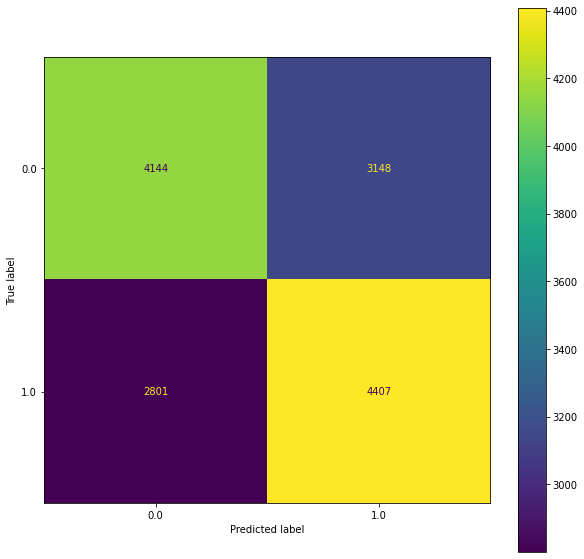

In [57]:
from sklearn import metrics
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
metrics.plot_confusion_matrix(lr.fit(X_train,y_train),X_test,y_test ,ax=ax)

In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test,model.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.60      0.56      0.58      7292
         1.0       0.58      0.62      0.60      7208

    accuracy                           0.59     14500
   macro avg       0.59      0.59      0.59     14500
weighted avg       0.59      0.59      0.59     14500



In [47]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
print(classification_report(y_test,rf.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83      7292
         1.0       0.90      0.70      0.79      7208

    accuracy                           0.81     14500
   macro avg       0.83      0.81      0.81     14500
weighted avg       0.83      0.81      0.81     14500



In [59]:
from sklearn.metrics import classification_report

rf = RandomForestClassifier(criterion="gini",n_estimators=400,max_features="log2",class_weight="balanced_subsample")
rf.fit(X_train,y_train)
print(classification_report(y_test,rf.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84      7292
         1.0       0.90      0.71      0.79      7208

    accuracy                           0.82     14500
   macro avg       0.83      0.82      0.81     14500
weighted avg       0.83      0.82      0.81     14500



In [123]:
from xgboost import XGBClassifier
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train,test_size=0.1, random_state=1)
model_xgb = XGBClassifier(learning_rate=0.005,objective='binary:logistic',n_estimators=1000,n_jobs=-1,seed=1)
model_xgb.fit(X_train1,y_train1,eval_set=[(X_train1, y_train1), (X_val, y_val)],verbose=False)
print(classification_report(y_test,model_xgb.predict(X_test).round()))

[22:14:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82      7292
         1.0       0.90      0.65      0.75      7208

    accuracy                           0.79     14500
   macro avg       0.81      0.79      0.79     14500
weighted avg       0.81      0.79      0.79     14500



In [124]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
pred2 = nb.fit(X_train,y_train).predict(X_test)
print("Naive Bayes model for product :\n",metrics.classification_report(y_test, pred2, digits=3))

Naive Bayes model for product :
               precision    recall  f1-score   support

         0.0      0.616     0.323     0.424      7292
         1.0      0.538     0.796     0.642      7208

    accuracy                          0.558     14500
   macro avg      0.577     0.560     0.533     14500
weighted avg      0.577     0.558     0.532     14500



In [128]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,y_train)
print("Decision tree model for product :\n",metrics.classification_report(y_test, dtc.predict(X_test), digits=3))

Decision tree model for product :
               precision    recall  f1-score   support

         0.0      0.710     0.684     0.697      7292
         1.0      0.692     0.718     0.705      7208

    accuracy                          0.701     14500
   macro avg      0.701     0.701     0.701     14500
weighted avg      0.701     0.701     0.701     14500



In [100]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled[last_col].values, y_resampled.values,test_size=0.2, random_state=1)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization , Dropout
from tensorflow.keras import initializers
from tensorflow import keras
from tensorflow.keras import regularizers

model = Sequential()

model.add(Dense(units=30, activation='tanh',kernel_initializer=initializers.GlorotNormal(),
                input_dim=X_train.shape[1]))
model.add(BatchNormalization())

model.add(Dense(units=10, activation='tanh',kernel_initializer=initializers.GlorotNormal()))
model.add(BatchNormalization())
model.add(Dense(units=4, activation='tanh',kernel_initializer=initializers.GlorotNormal()))
model.add(BatchNormalization())
model.add(Dense(units=1, activation='sigmoid',kernel_initializer=initializers.GlorotNormal()))

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.0005,
    decay_steps=10000,
    decay_rate=0.9)

optimizer = keras.optimizers.Adam(
    learning_rate=lr_schedule,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    amsgrad=False,
    name="Adam")
'''optimizer = keras.optimizers.Adagrad(
    learning_rate=lr_schedule,
    initial_accumulator_value=0.1,
    epsilon=1e-08,
    name="Adagrad")'''

'''optimizer = keras.optimizers.Ftrl(
    learning_rate=lr_schedule,
    learning_rate_power=-0.5,
    initial_accumulator_value=0.1,
    l1_regularization_strength=0.0,
    l2_regularization_strength=0.0,
    name="Ftrl",
    l2_shrinkage_regularization_strength=0.0,
    beta=0
)
'''

callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)


model.compile(loss='binary_crossentropy',
              optimizer=optimizer)
History = model.fit(X_train, y_train, epochs=500, batch_size=16,validation_data=(X_test, y_test),callbacks=[callback],workers=4)

Epoch 1/500
3625/3625 [==============================] - 6s 1ms/step - loss: 0.6947 - val_loss: 0.6728
Epoch 2/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6713 - val_loss: 0.6652
Epoch 3/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6659 - val_loss: 0.6625
Epoch 4/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6629 - val_loss: 0.6592
Epoch 5/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6618 - val_loss: 0.6566
Epoch 6/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6600 - val_loss: 0.6528
Epoch 7/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6545 - val_loss: 0.6506
Epoch 8/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6539 - val_loss: 0.6485
Epoch 9/500
3625/3625 [==============================] - 5s 1ms/step - loss: 0.6501 - val_loss: 0.6455
Epoch 10/500
3625/3625 [==============================] - 5s 1ms/step - l

In [101]:
print(classification_report(y_test,model.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.67      0.72      0.70      7292
         1.0       0.70      0.65      0.67      7208

    accuracy                           0.68     14500
   macro avg       0.69      0.68      0.68     14500
weighted avg       0.69      0.68      0.68     14500



In [229]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled.values, y_resampled.values,test_size=0.1, random_state=1)

In [237]:
from kerastuner import HyperModel
from tensorflow.keras import models, layers

class classifHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape    
    
    def build(self, hp):
        model = Sequential()
        model.add(
            layers.Dense(kernel_initializer=initializers.GlorotNormal(),
                         kernel_regularizer=regularizers.l2(hp.Float(1e-4,1e-5,1e-6,default=1e-6)),
                units=hp.Int('units', 8, 12, 6 ,default=8),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu','selu', 'tanh'],
                    default='relu'),
                input_shape=input_shape
            )
        )
        
        model.add(
            layers.Dense(kernel_initializer=initializers.GlorotNormal(),
                         kernel_regularizer=regularizers.l2(hp.Float(1e-4,1e-5,1e-6,default=1e-6)),
                units=hp.Int('units', 12, 8, 6, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu','selu', 'tanh'],
                    default='relu')
            ))
        model.add(
            layers.Dense(kernel_initializer=initializers.GlorotNormal(),
                         kernel_regularizer=regularizers.l2(hp.Float(1e-4,1e-5,1e-6,default=1e-6)),
                units=hp.Int('units', 12, 8, 6, default=16),
                activation=hp.Choice(
                    'dense_activation',
                    values=['relu','selu', 'tanh'],
                    default='relu')
        ))
        
        model.add(layers.Dense(1,activation="sigmoid",kernel_initializer=initializers.GlorotNormal()))
        
        model.compile(
            optimizer=keras.optimizers.Adam(hp.Float("learning_rate",min_value=0.00001,max_value=0.1,default=0.005)),
            loss='binary_crossentropy',metrics=['accuracy']
        )
        
        return model
input_shape = (X_train.shape[1],)
hypermodel2 = classifHyperModel(input_shape)

from kerastuner.tuners import RandomSearch
from kerastuner.tuners.bayesian import BayesianOptimization
tuner_rs = BayesianOptimization(
            hypermodel2,
            objective='accuracy',
            seed=42,max_trials=2,
             executions_per_trial=2)
tuner_rs.search(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

In [238]:
input_shape = (X_train.shape[1],)
hypermodel2 = classifHyperModel(input_shape)

In [239]:
from kerastuner.tuners import RandomSearch
from kerastuner.tuners.bayesian import BayesianOptimization
tuner_rs = BayesianOptimization(
            hypermodel2,
            objective='accuracy',
            seed=42,max_trials=2,
             executions_per_trial=2)


In [240]:
tuner_rs.search(X_train, y_train, epochs=100, validation_split=0.1, verbose=0)

INFO:tensorflow:Oracle triggered exit


In [241]:
best_model = tuner_rs.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_test, y_test)

227/227 [==============================] - 0s 884us/step - loss: 0.6512 - accuracy: 0.6241


In [242]:
accuracy

0.6359999775886536

In [243]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 664       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 817
Trainable params: 817
Non-trainable params: 0
_________________________________________________________________


In [244]:
print(classification_report(y_test,best_model.predict(X_test).round()))

              precision    recall  f1-score   support

         0.0       0.64      0.61      0.63      3622
         1.0       0.63      0.66      0.65      3628

    accuracy                           0.64      7250
   macro avg       0.64      0.64      0.64      7250
weighted avg       0.64      0.64      0.64      7250



---

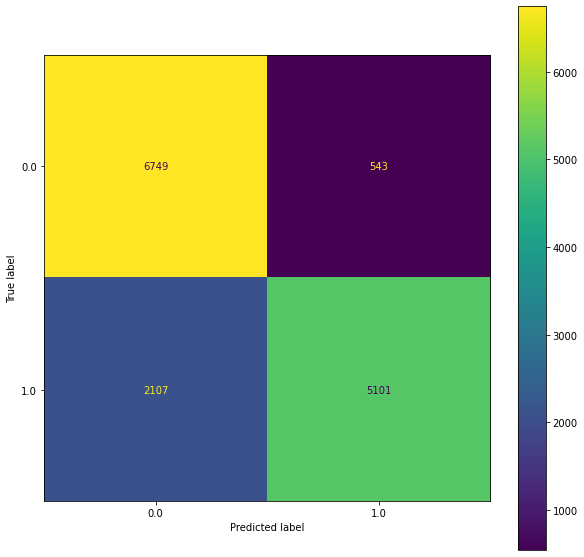

In [60]:
from sklearn import metrics
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
metrics.plot_confusion_matrix(rf,X_test,y_test ,ax=ax)

In [61]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.76      0.93      0.84      7292
         1.0       0.90      0.71      0.79      7208

    accuracy                           0.82     14500
   macro avg       0.83      0.82      0.81     14500
weighted avg       0.83      0.82      0.81     14500



In [74]:
pred1 = pd.DataFrame(np.around(rf.predict_proba(X_test),2),columns=["churn_no","churn_yes"])
pred1["true"] = y_test.values
pred1.index = X_test.index
pred1

,churn_no,churn_yes,true
48587,0.82,0.18,0.0
27940,0.64,0.36,0.0
21392,0.52,0.48,0.0
28285,0.86,0.14,0.0
13412,0.41,0.59,0.0
...,...,...,...
159,0.65,0.35,0.0
62687,0.22,0.78,1.0
17651,0.40,0.60,1.0
17125,0.38,0.62,1.0


In [75]:
pd.concat([X_test,pred1],axis=1)

,MonthlyMinutes,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetPrice,HandsetRefurbished_Yes,HandsetWebCapable_Yes,TruckOwner_Yes,BuysViaMailOrder_Yes,RespondsToMailOffers_Yes,OptOutMailings_Yes,NonUSTravel_Yes,NewCellphoneUser_Yes,MadeCallToRetentionTeam_Yes,CreditRating_2-High,CreditRating_3-Good,CreditRating_4-Medium,CreditRating_5-Low,Occupation_Retired,MaritalStatus_Unknown,IncomeGroup_3,RetentionCalls_1,RetentionOffersAccepted_1,ThreewayCalls,MonthlyRevenue,CustomerCareCalls,PercChangeMinutes,DirectorAssistedCalls,CallWaitingCalls,TotalRecurringCharge,UnansweredCalls,DroppedBlockedCalls,DroppedCalls,churn_no,churn_yes,true
48587,-0.306195,-0.055058,0.084691,-0.215054,-0.495918,0.051480,0.000000,0.0,-0.475728,0.500000,0.000000,0.00,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,-0.359680,0.000000,0.283784,-0.252525,-0.230769,0.000000,-0.509554,-0.458716,-0.428571,0.82,0.18,0.0
27940,1.189381,2.560908,2.149837,4.333333,1.520408,0.797941,0.000000,0.0,0.258900,-0.750000,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,4.333333,1.273164,1.176471,-0.601351,1.000000,2.846154,0.500000,0.213376,2.724771,0.385714,0.64,0.36,0.0
21392,-0.265487,-0.352374,-0.358306,-0.215054,-0.363265,-0.369369,0.000000,0.0,0.796117,0.250000,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.000000,-0.159413,0.000000,-0.641892,-0.252525,0.000000,-0.100000,-0.136943,-0.330275,-0.185714,0.52,0.48,0.0
28285,1.435398,2.746731,1.648208,4.591398,0.983673,1.608752,2.000000,1.0,-0.705502,-0.208333,0.000000,2.50,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.0,1.0,0.0,0.0,1.000000,0.0,0.0,0.000000,0.967156,2.176471,0.040541,-0.252525,3.615385,0.866667,0.563694,0.587156,0.571429,0.86,0.14,0.0
13412,0.049558,0.262904,0.433225,0.720430,-0.176531,0.244530,0.000000,0.0,0.870550,-0.750000,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,-0.110814,0.588235,-0.912162,1.000000,0.307692,-0.100000,-0.232484,0.339450,0.857143,0.41,0.59,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,9.729204,11.105988,10.726384,15.021505,13.197959,4.916345,7.000000,3.0,-0.459547,-0.041667,0.000000,1.00,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,2.333333,12.848331,3.117647,0.750000,55.494949,97.230769,5.233333,4.480892,6.091743,0.671429,0.65,0.35,0.0
62687,-0.393983,-0.179054,-0.308295,-0.181529,-0.504214,-0.190334,1.688217,0.0,-0.094661,0.528676,1.366106,3.75,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.688217,0.311783,0.0,0.0,0.0,0.0,0.311783,0.0,0.0,0.000000,-0.061904,0.000000,-0.399882,0.609484,0.139809,0.292145,-0.360793,-0.125197,-0.053776,0.22,0.78,1.0
17651,-0.187611,0.467997,0.358306,0.107527,-0.122449,0.042471,1.000000,1.0,0.203883,-0.750000,0.000000,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,-0.364486,0.000000,0.195946,0.000000,1.307692,-0.500000,-0.222930,0.155963,0.528571,0.40,0.60,1.0
17125,0.242478,0.704749,-0.218241,-0.139785,-0.285714,-0.128700,0.000000,0.0,1.087379,-0.208333,0.000000,0.00,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.000000,-0.276636,2.529412,-0.506757,-0.252525,0.538462,-0.233333,-0.359873,-0.146789,-0.142857,0.38,0.62,1.0


In [76]:
from scipy.stats import mannwhitneyu
mannwhitneyu(pred1["churn_yes"],pred1["churn_no"])

MannwhitneyuResult(statistic=103479665.0, pvalue=0.01048976848257332)

<AxesSubplot:xlabel='churn_yes', ylabel='Density'>

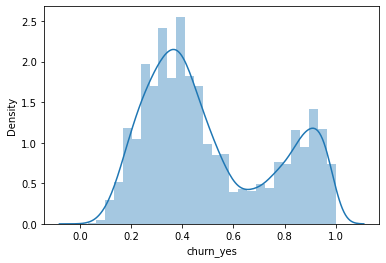

In [77]:
import seaborn as sns
sns.distplot(pred1["churn_yes"])

<AxesSubplot:xlabel='churn_no', ylabel='Density'>

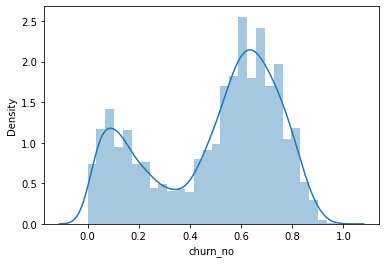

In [78]:
sns.distplot(pred1["churn_no"])